In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('churn.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
numericals = df.select_dtypes(include=['int64','float64']).columns.tolist()
categoricals = df.select_dtypes(exclude=['int64','float64']).columns.tolist()

print(f"numericals columns are {numericals}")
print(f"categoricals columns are {categoricals}")

numericals columns are ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
categoricals columns are ['Surname', 'Geography', 'Gender']


In [ ]:
df[numericals].describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df[categoricals].describe()

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [ ]:
for col in categoricals:
  print(f"Value counts for column {col}:")
  print(df[col].value_counts())
  print("---"*10)
  print("\n")

Value counts for column Surname:
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64
------------------------------


Value counts for column Geography:
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
------------------------------


Value counts for column Gender:
Male      5457
Female    4543
Name: Gender, dtype: int64
------------------------------




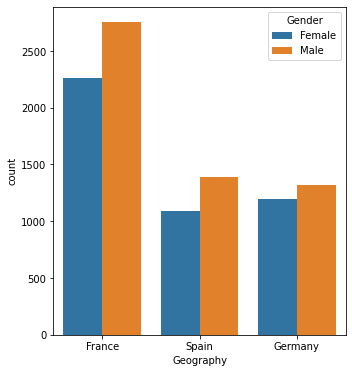

In [ ]:
selected_categoricals = ['Geography']
plt.figure(figsize=(5,10))

features = selected_categoricals
for i in np.arange(1, len(features)+1):
    plt.subplot(2, len(features)//2+1, i)
    sns.countplot(x=df[features[i-1]], hue=df['Gender'])
    plt.xlabel(features[i-1])
    plt.tight_layout()

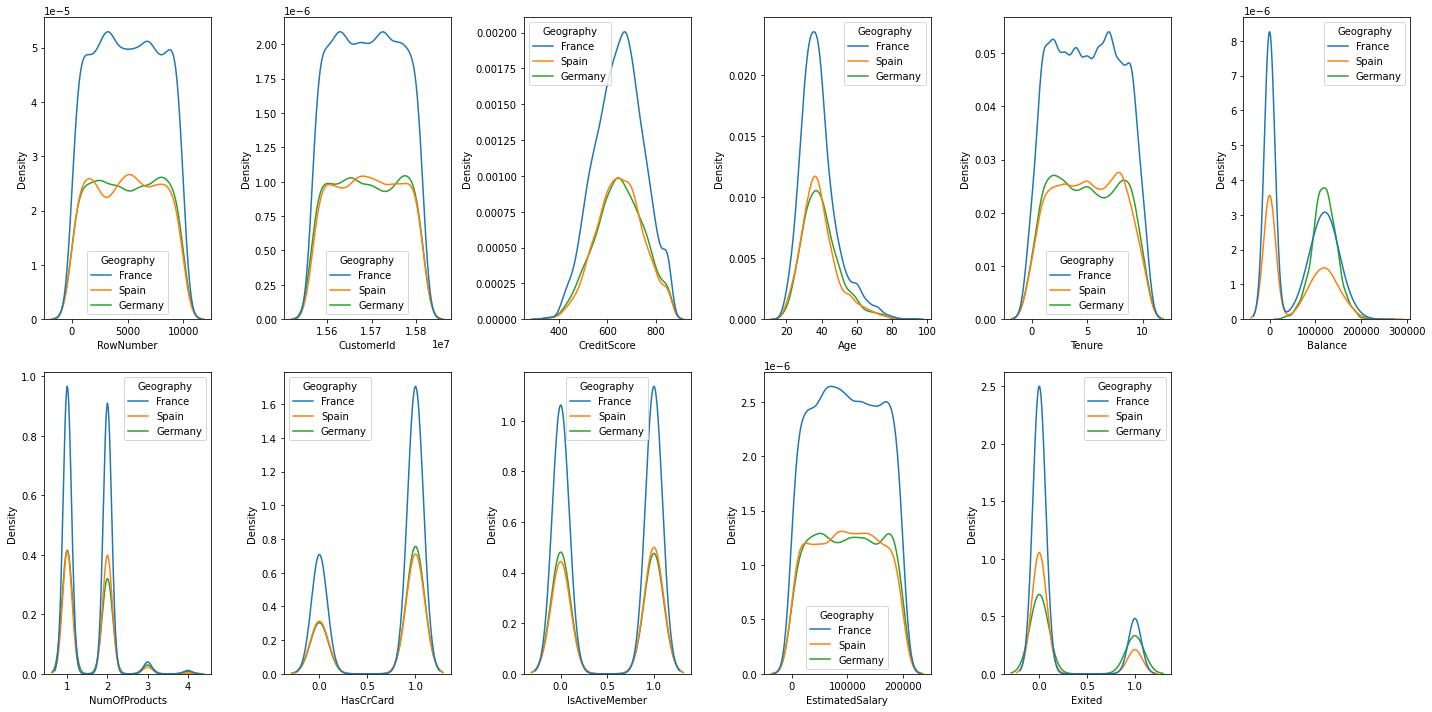

In [ ]:
plt.figure(figsize=(20,10))

features = numericals
for i in np.arange(1, len(features)+1):
    plt.subplot(2, len(features)//2+1, i)
    sns.kdeplot(x=df[features[i-1]], hue=df['Geography'])
    plt.xlabel(features[i-1])
    plt.tight_layout()

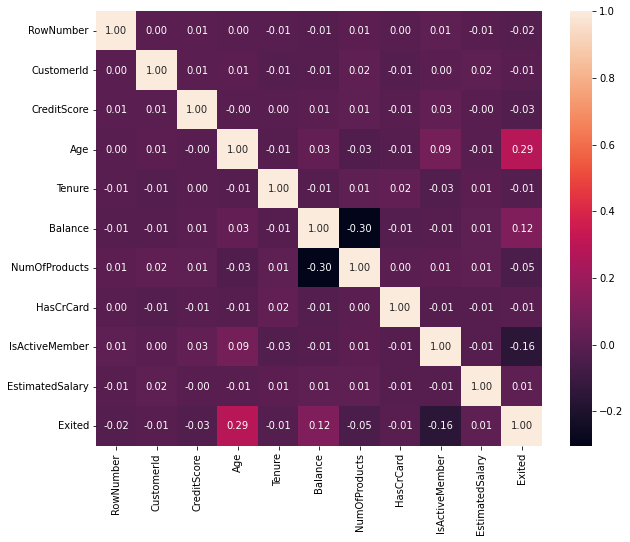

In [ ]:
plt.figure(figsize=(10,8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

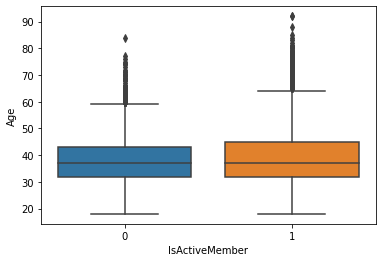

In [ ]:
sns.boxplot(data=df,
            x='IsActiveMember',
            y='Age'
            )

In [ ]:
df1 = df.groupby('Geography').agg(
    num_geo = ('Exited','count'),
    num_exited = ('Exited','sum')
).reset_index()
df1

,Geography,num_geo,num_exited
0,France,5014,810
1,Germany,2509,814
2,Spain,2477,413


In [ ]:
df1['exited_rate'] = df1['num_exited'] / df1['num_geo']


In [ ]:
df1

,Geography,num_geo,num_exited,exited_rate
0,France,5014,810,0.161548
1,Germany,2509,814,0.324432
2,Spain,2477,413,0.166734


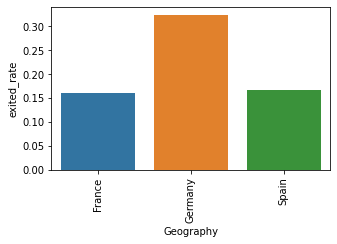

In [ ]:
plt.figure(figsize=(5,3))
sns.barplot(data=df1, x='Geography', y='exited_rate')
plt.xticks(rotation=90)
plt.show()